In [198]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [128]:
tweets = pd.read_excel("/Users/Mags/Desktop/DATA SCIENCE/Retweets/tweets.xlsx")

EDA

In [129]:
tweets.head(5)

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,"travel, TTOT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [130]:
tweets.tail()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
42363,Tue Dec 20 00:25:13 +0000 2016,811004491378073600,#BusinessInsider Your Money #Travel The Bigges...,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,NaN,NaN,0,0,"BusinessInsider, Travel, Vacation",NaN,NaN,NaN,NaN,NaN,NaN,NaN,103708562,Andy Marcolin,AndyMarcolin,"ÜT: 43.484417,-79.720563",- Owner of - QB Sports and The Judge & Jury - ...,http://t.co/aUs1RvWTzE,http://www.bostonmanor.ca/,537,170,90,Mon Jan 11 00:36:46 +0000 2010,22170,449,NaN
42364,Tue Dec 20 00:25:12 +0000 2016,811004490300223492,.@jessicaparsons @brokegirlsdiary #rockstar #D...,False,"<a href=""http://www.facebook.com/twitter"" rel=...",NaN,NaN,NaN,0,0,"rockstar, DedicatedTalent, actress, blogger, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2807981322,Dedicated Talent,DedicatedTalent,Los Angeles,Talent | Literary | Production,https://t.co/6g3HhXQBkh,https://pro-labs.imdb.com/company/co0499796/,2635,1870,321,Sat Sep 13 19:18:55 +0000 2014,15266,449,NaN
42365,Tue Dec 20 00:25:12 +0000 2016,811004489813495808,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771487629477023744,Raphael Cameron,FilatArtemev,NaN,"udemy instructor, author, marketeer, into tech...",NaN,NaN,91,54,83,Thu Sep 01 23:19:19 +0000 2016,23419,449,NaN
42366,Tue Dec 20 00:25:12 +0000 2016,811004488932737024,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771758637652074496,Sky Choi,tekusaaleksand2,NaN,Keep track of your cryptocurrencies and genera...,NaN,NaN,68,50,63,Fri Sep 02 17:16:12 +0000 2016,20737,449,NaN
42367,Tue Dec 20 00:25:12 +0000 2016,811004487737360384,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771752634306981892,Brazil Harrison,AelitaFadeeva,NaN,"ETHEREUM Foundation, project community/ecosys...",NaN,NaN,213,51,50,Fri Sep 02 16:52:21 +0000 2016,23982,449,NaN


In [131]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
TweetPostedTime              42368 non-null object
TweetID                      42368 non-null int64
TweetBody                    42368 non-null object
TweetRetweetFlag             42368 non-null bool
TweetSource                  42368 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         189 non-null float64
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            42368 non-null int64
TweetFavoritesCount          42368 non-null int64
TweetHashtags                42268 non-null object
TweetPlaceID                 1000 non-null object
TweetPlaceName               1000 non-null object
TweetPlaceFullName           1000 non-null object
TweetCountry                 999 non-null object
TweetPlaceBoundingBox        1000 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 non-null fl

Let's go through the columns and see how the data looks and if there are features that could potentially be good predictors:

First our target:

In [132]:
tweets.TweetRetweetCount.describe()

count    42368.000000
mean      1081.095402
std       1432.473561
min          0.000000
25%          0.000000
50%         14.000000
75%       3069.000000
max       4056.000000
Name: TweetRetweetCount, dtype: float64

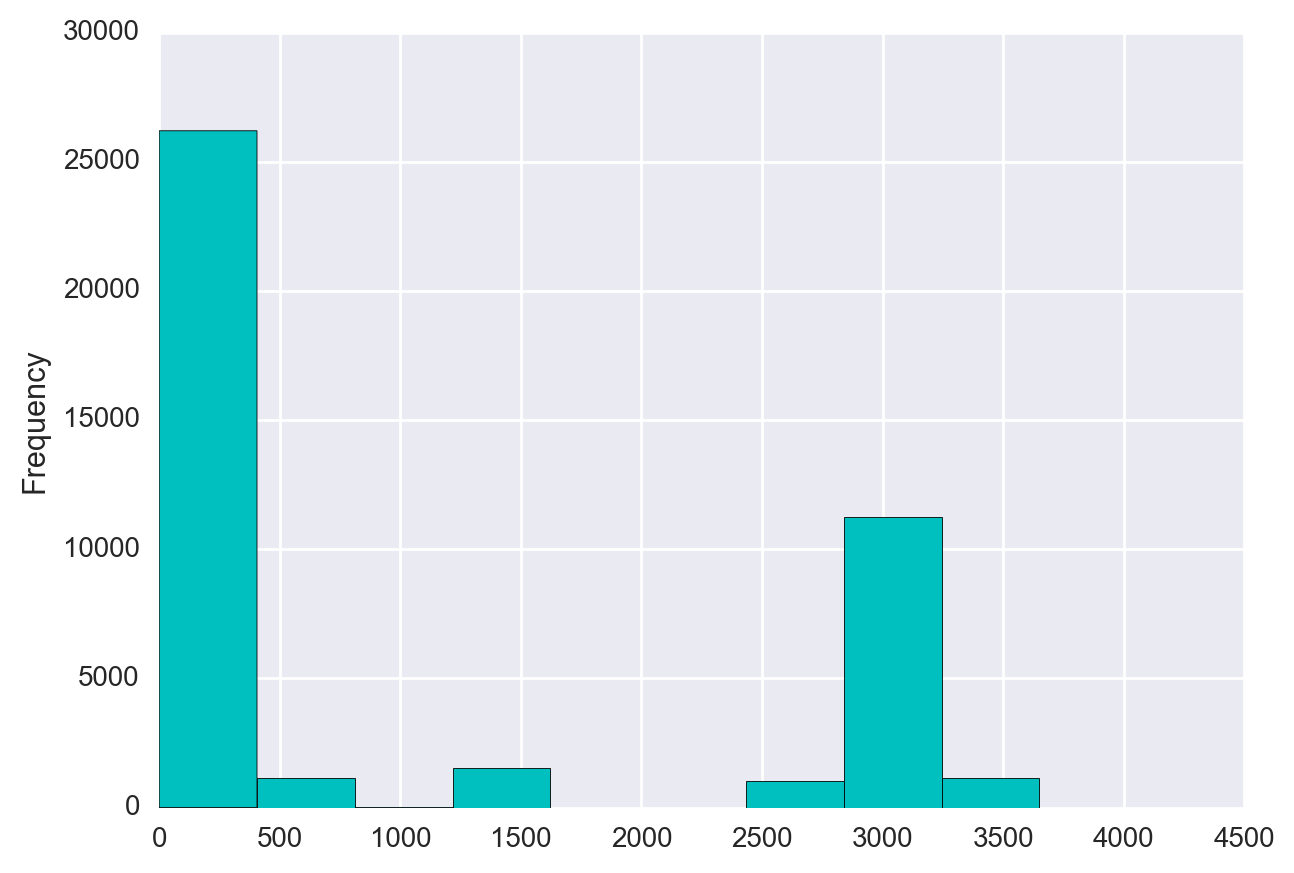

In [133]:
plt.figure(figsize = (7, 5))
tweets.TweetRetweetCount.plot(kind='hist', color='c', bins=10)
plt.show()

Notes:
* mean 1081, stdev 1432, mode 14 - data is quite spread
* bimodal histogram - two peaks: around 0 and around 3000 which can indicate most tweets are not retweeted but these that are have tendency of going viral

Tweet posted time

All tweets in the df are from the same day, just hour of posting differs. Let's extract the hour of tweets and see how the posting times are distributed.

In [134]:
tweets["PostHour"] = tweets.TweetPostedTime.str[11:13]

In [204]:
#TweetPostedTime is not needed anymore, let's add it to drop_list:
drop_list = ["TweetPostedTime"]

In [136]:
tweets["PostHour"].head()

0    10
1    10
2    10
3    10
4    10
Name: PostHour, dtype: object

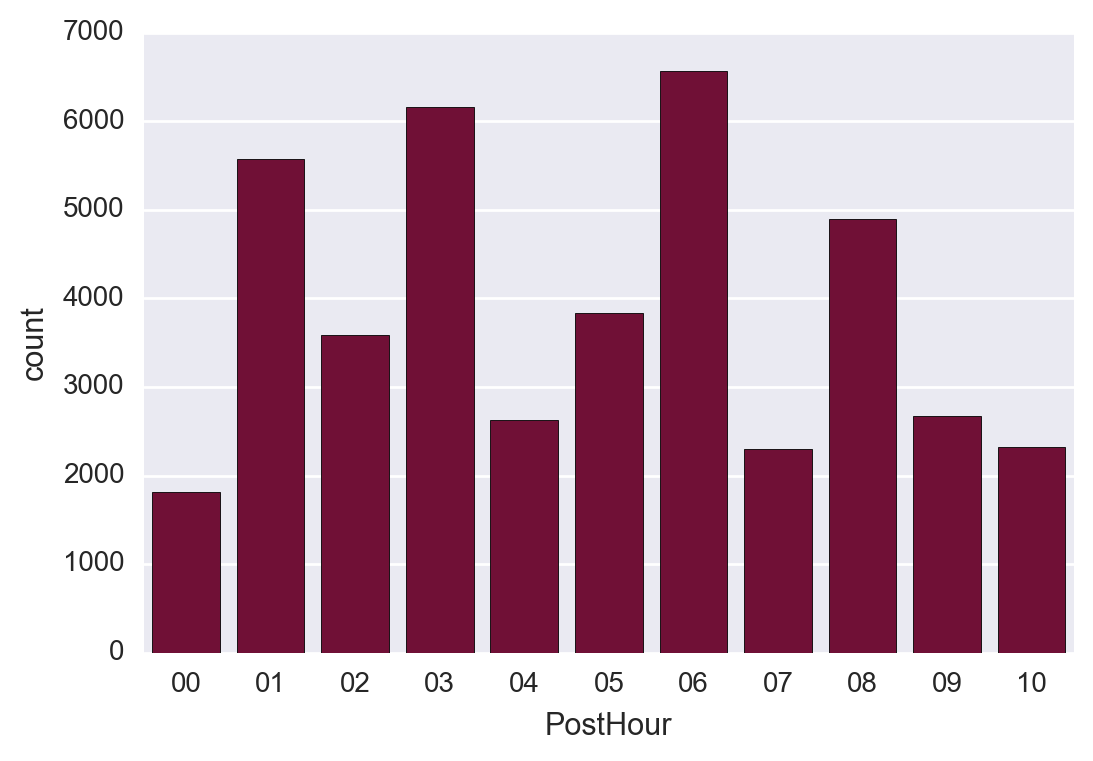

In [137]:
plt.figure(figsize = (6, 4))
sns.countplot(x="PostHour", data=tweets, color= '#800033')
plt.show()

In [205]:
#TweetID will not be needed:
drop_list.append("TweetID")

TweetBody 
I don't have enough time to do full on text analysis but I can extract most common words from the body and use their presence (or absence) as the predictor.

In [139]:

# Find most common words in TweetBody column

cnt_vect = CountVectorizer(binary=True, stop_words='english', max_features=5)
D = cnt_vect.fit(tweets.TweetBody)
common_words = D.vocabulary_.keys()
print 'Most popular words in TweetBody column:', common_words

Most popular words in TweetBody column: [u'travel', u'stylishrentals', u'rt', u'beach', u'https']


In [140]:
# and https are not keywords per se, let's get rid of them
common_words.remove('rt')
common_words.remove('https')
common_words

[u'travel', u'stylishrentals', u'beach']

In [141]:
#however presence of 'https' ie link can have influence on retweeting value. Let's create new column
tweets['LinkInBody'] = tweets.TweetBody.map(lambda x: 1 if 'https' in x else 0)

In [143]:
tweets.LinkInBody.head()

0    1
1    1
2    1
3    1
4    1
Name: LinkInBody, dtype: int64

In [170]:
#function to check if keywords are in tweet body

def check_if_in_col(column_text):
    for item in common_words:
        if item in column_text:
            return 1
        else:
            return 0

tweets["PopularWordsBody"] = tweets['TweetBody'].map(check_if_in_col)


In [125]:
tweets["PopularWordsBody"].head()

0    1
1    0
2    1
3    0
4    0
Name: PopularWordsBody, dtype: int64

In [207]:
#Drop body
drop_list.append("TweetBody")

Next columns:

* TweetRetweetFlag - boolean for whether tweet was retweeted or not. Doing similar thing as our target column - risk of collinearity - drop
* TweetSource - all retwitted tweets have Twitter as a source - not much info here - drop
* TweetInReplyToStatusID - too many nans - drop
* TweetInReplyToUserID - too many nans - drop
* TweetInReplyToScreenName - too many nans - drop


In [210]:
drop_list.extend(["TweetRetweetFlag", "TweetSource", "TweetInReplyToStatusID", "TweetInReplyToUserID",
                "TweetInReplyToScreenName"])

TweetFavoritesCount - looks like potentially good predictor. Let's see:

In [146]:
tweets.TweetFavoritesCount.describe()

count    42368.000000
mean         0.805561
std         37.214059
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2813.000000
Name: TweetFavoritesCount, dtype: float64

In [156]:
#uh-oh - the above indicates that huge majority of tweets has 0 favourtites. Let's see:
tweets.TweetFavoritesCount.value_counts().head(10)

0    38208
1     2487
2      765
3      345
4      154
5       89
6       50
7       35
8       25
9       22
Name: TweetFavoritesCount, dtype: int64

In [ ]:
#yes, that seems to be the case. Still maybe it will help us in our predicition. Let's leave it.

Hashtags:
Let's do the same thing as in Body, but first there are some nan values to deal with:
    

In [165]:
tweets.TweetHashtags.isnull().value_counts()

False    42268
True       100
Name: TweetHashtags, dtype: int64

In [166]:
#I will replace nans with string 'none' which would help with vectorizer later
tweets.TweetHashtags.fillna('none', inplace=True)

In [168]:
H = cnt_vect.fit(tweets.TweetHashtags)
common_words = H.vocabulary_.keys()
print 'Most popular words in TweetHastags column:', common_words

Most popular words in TweetHastags column: [u'travel', u'israel', u'travelblogger', u'jerusalem', u'holiday']


In [171]:
#Interesting. 
tweets["PopularWordsHashtag"] = tweets['TweetHashtags'].map(check_if_in_col)


In [173]:
tweets["PopularWordsHashtag"].head()

0    1
1    0
2    1
3    0
4    0
Name: PopularWordsHashtag, dtype: int64

Next:

* TweetPlaceID                 1000 non-null object - Too much missing data - drop
* TweetPlaceName               1000 non-null object - Too much missing data - drop
* TweetPlaceFullName           1000 non-null object - Too much missing data - drop
* TweetCountry                 999 non-null object - Too much missing data - drop
* TweetPlaceBoundingBox        1000 non-null object - Too much missing data - drop
* TweetPlaceAttributes         0 non-null float64 - Too much missing data - drop
* TweetPlaceContainedWithin    0 non-null float64 - Too much missing data - drop
* UserID                       42368 non-null int64 - No predictive value - drop



In [212]:
drop_list.extend(["TweetPlaceID", "TweetPlaceName", "TweetPlaceFullName", "TweetCountry",
                "TweetPlaceBoundingBox", "TweetPlaceAttributes", "TweetPlaceContainedWithin", "UserID"])

In [ ]:
UserID                       42368 non-null int64
UserName                     42368 non-null object
UserScreenName               42368 non-null object
UserLocation                 26342 non-null object
UserDescription              38004 non-null object
UserLink                     16599 non-null object
UserExpandedLink             16562 non-null object
UserFollowersCount           42368 non-null int64
UserFriendsCount             42368 non-null int64
UserListedCount              42368 non-null int64
UserSignupDate               42368 non-null object
UserTweetCount               42368 non-null int64

In [176]:
#UserName

tweets.UserName.head(10)

0         CjQenterprises
1                 monica
2           Paula Schuck
3       Primal Sanctuary
4                    Joe
5                    Rey
6    The Quirky wanderer
7         Hayley Preston
8         ibrahim keklik
9          Whiskey About
Name: UserName, dtype: object

In [179]:
#I dont think these are meaningful -  drop 

tweets.drop("UserName", axis =1, inplace=True)

In [180]:
#UserScreenName
tweets.UserScreenName.head(10)

0     CjQenterprises
1           mama0004
2          inkscrblr
3    primalsanctuary
4    biryukovasever2
5     GerasimovArvid
6         DivsiGupta
7    guramponomarev5
8           gnkeklik
9     whiskeyaboutlb
Name: UserScreenName, dtype: object

In [ ]:
#As above - drop

tweets.drop("UserScreenName", axis =1, inplace=True)

In [181]:
#User location - 1/3 data is missing. too much for meaningful imputation - drop
tweets.drop("UserLocation", axis =1, inplace=True)

In [182]:
#User description - let's do common words here too:
tweets.UserDescription.isnull().value_counts()


False    38004
True      4364
Name: UserDescription, dtype: int64

In [183]:
tweets.UserDescription.fillna('none', inplace=True)

In [184]:
U = cnt_vect.fit(tweets.UserDescription)
common_words = U.vocabulary_.keys()
print 'Most popular words in TweetHastags column:', common_words

Most popular words in TweetHastags column: [u'travel', u'world', u'life', u'love', u'https']


In [185]:
tweets["PopularWordsDescr"] = tweets['UserDescription'].map(check_if_in_col)


In [186]:
tweets["PopularWordsDescr"].head()

0    0
1    0
2    0
3    1
4    0
Name: PopularWordsDescr, dtype: int64

Next:

* UserLink                     16599 non-null object -  Too much missing data - drop
* UserExpandedLink             16562 non-null object -  Too much missing data - drop

In [187]:
tweets.drop("UserLink", axis =1, inplace=True)
tweets.drop("UserExpandedLink", axis =1, inplace=True)

Next:

* UserFollowersCount           42368 non-null int64
* UserFriendsCount             42368 non-null int64
* UserListedCount              42368 non-null int64
* UserTweetCount               42368 non-null int64

Numerical columns and perhaps good predictors? Lets look closer:


http://www.wikinomics.com/blog/index.php/2009/11/23/twitter-popularity-follower-vs-list-counts/

In [189]:
tweets.UserFollowersCount.head()

0     6334
1      154
2    23433
3    11136
4       55
Name: UserFollowersCount, dtype: int64

In [199]:
tweets.UserFollowersCount.describe()

count     42368.00
mean       6197.00
std       56200.06
min           0.00
25%          40.00
50%         149.00
75%        1819.25
max     4572706.00
Name: UserFollowersCount, dtype: float64

In [201]:
#Huge stdev perhaps influenced by the large max value? Let's sort the values and see:
tweets.UserFollowersCount.sort_values(ascending=False).head(15)


4108     4572706
1722     4572706
29717    4572671
22562    4572666
18732    4572661
36161     820455
26511     820455
31772     747595
41304     741864
27508     673414
11382     673414
6219      673414
467       673413
4636      673413
33537     623525
Name: UserFollowersCount, dtype: int64

In [ ]:
There seem to be 5 very huge outliers. Also suspicious same large numbers - is it the same user?